<a href="https://colab.research.google.com/github/bashakamal/bashakamal/blob/main/Avacado_Analysis_using_fbprophet_forecacsting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Avacado price analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#import dataset
df=pd.read_csv('/content/avocado.csv',parse_dates=['Date'])
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


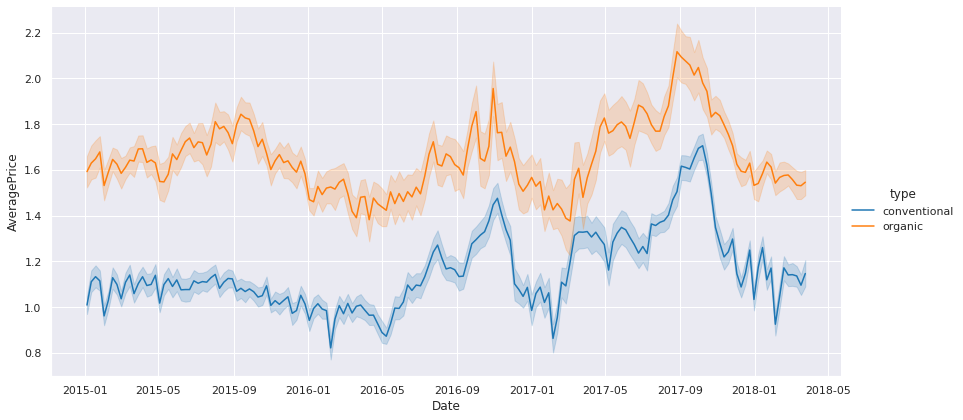

In [6]:
#Two types we plotting according to  date and average price
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.relplot(x='Date',y='AveragePrice',data=df,kind='line',hue='type',height=6,aspect=2)

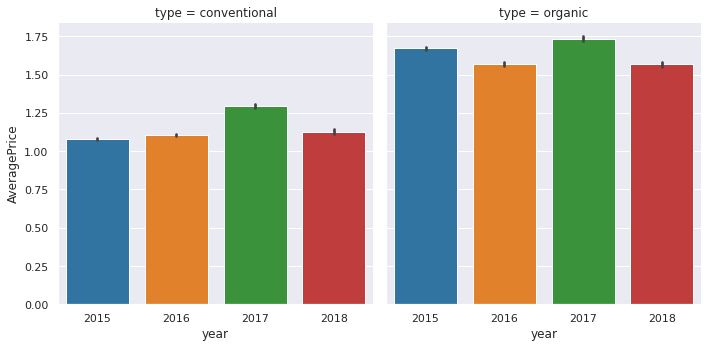

In [7]:
#average price vs year
display(sns.catplot(x='year',y='AveragePrice',data=df,col='type',kind='bar'))

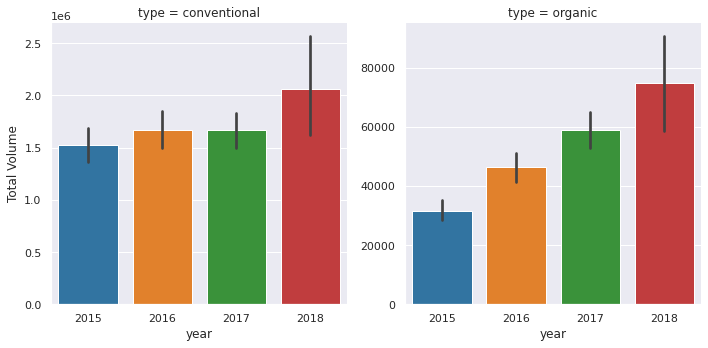

In [8]:
#volume vs year
display(sns.catplot(x='year',y='Total Volume',data=df,col='type',kind='bar',sharey=False))

In [9]:
#Identifying data mponth wise for seasonal data.
df.Date.dt.strftime('%b')

0        Dec
1        Dec
2        Dec
3        Dec
4        Nov
        ... 
18244    Feb
18245    Jan
18246    Jan
18247    Jan
18248    Jan
Name: Date, Length: 18249, dtype: object

In [10]:
#adding a column in dataframe
df['month']=df.Date.dt.strftime('%b')

In [85]:
#grouping based on seasonal
seasonal=df.groupby(['month','type'],as_index=False)['AveragePrice'].mean().sort_values('month')

In [12]:
seasonal

,month,type,AveragePrice
0,Apr,conventional,1.142350
1,Apr,organic,1.606410
2,Aug,conventional,1.235399
3,Aug,organic,1.789630
4,Dec,conventional,1.077393
5,Dec,organic,1.585193
6,Feb,conventional,1.017315
7,Feb,organic,1.531458
8,Jan,conventional,1.069095
9,Jan,organic,1.552942


In [13]:
months=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [14]:
#here categories use to sort month wise 
df.month=pd.Categorical(values=df.month,categories=months,ordered=True)

In [15]:
seasonal=df.groupby(['month','type'],as_index=False)['AveragePrice'].mean().sort_values('month')

In [16]:
seasonal

,month,type,AveragePrice
0,Jan,conventional,1.069095
1,Jan,organic,1.552942
2,Feb,conventional,1.017315
3,Feb,organic,1.531458
4,Mar,conventional,1.126209
5,Mar,organic,1.538301
6,Apr,conventional,1.142350
7,Apr,organic,1.606410
8,May,conventional,1.089577
9,May,organic,1.603624


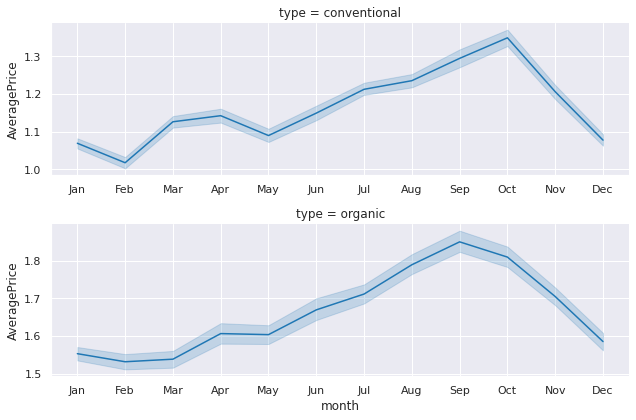

In [17]:
#two types of month wise vs avaerage price plot
sns.relplot(x='month',y='AveragePrice',data=df,kind='line',row='type',height=3,aspect=3,facet_kws={'sharey':False,'sharex':False})

In [18]:
#grouping region and year for mean of average price and total volume data
df1=df.groupby(['region','year'],as_index=False)['AveragePrice','Total Volume'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [19]:
df1

,region,year,AveragePrice,Total Volume
0,Albany,2015,1.538750,3.874900e+04
1,Albany,2016,1.533942,5.061861e+04
2,Albany,2017,1.637830,4.935455e+04
3,Albany,2018,1.435833,6.424942e+04
4,Atlanta,2015,1.380577,2.233817e+05
...,...,...,...,...
211,West,2018,1.297083,3.853212e+06
212,WestTexNewMexico,2015,1.259320,4.031456e+05
213,WestTexNewMexico,2016,1.246635,4.212253e+05
214,WestTexNewMexico,2017,1.281538,4.556691e+05


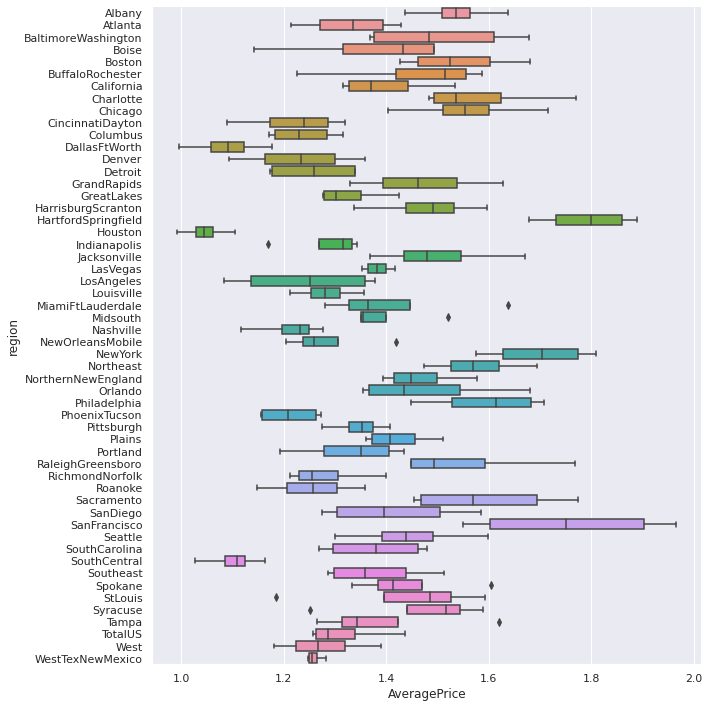

In [20]:
sns.catplot(x='AveragePrice',y='region',data=df1,height=10,aspect=1,kind='box')

In [21]:
from fbprophet import Prophet

In [27]:
#data based on total us avocado price as target
subset=df[(df.region=='TotalUS')&(df.type=='conventional')]
subset=subset[['Date','AveragePrice']]
subset=subset.set_index('Date').sort_index()
subset

,AveragePrice
Date,
2015-01-04,0.95
2015-01-11,1.01
2015-01-18,1.03
2015-01-25,1.04
2015-02-01,0.89
...,...
2018-02-25,1.06
2018-03-04,1.07
2018-03-11,1.09


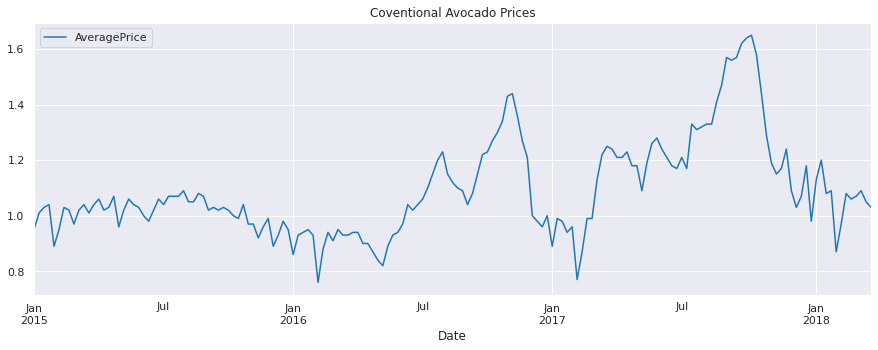

In [40]:
subset.plot(figsize=(15,5),title='Coventional Avocado Prices')
plt.show()

In [60]:
#split date for train and test
split_date='01-Aug-2017'
train=subset.loc[subset.index<=split_date] 
test=subset.loc[subset.index>split_date]



In [61]:
df_n=test.rename(columns={'AveragePrice':'Test Set'}).join(train.rename(columns={'AveragePrice':'Training Set'}),how='outer')

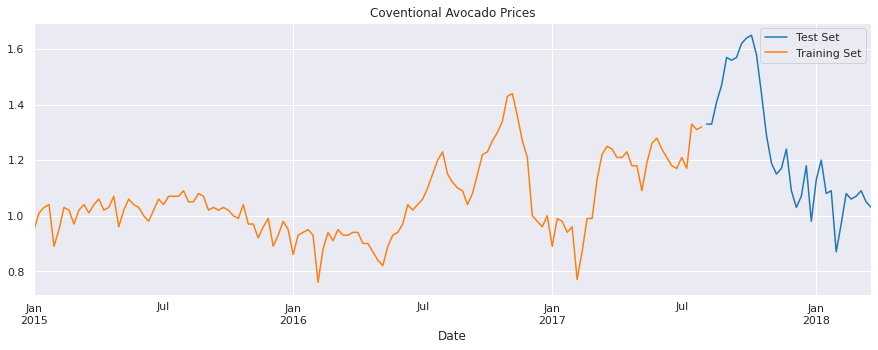

In [62]:
df_n.plot(figsize=(15,5),title='Coventional Avocado Prices')
plt.show()

In [63]:
train

,AveragePrice
Date,
2015-01-04,0.95
2015-01-11,1.01
2015-01-18,1.03
2015-01-25,1.04
2015-02-01,0.89
...,...
2017-07-02,1.21
2017-07-09,1.17
2017-07-16,1.33


In [64]:
#format columns of prophet model using ds and y 
train=train.reset_index()
train.columns=['ds','y']


In [65]:
train

,ds,y
0,2015-01-04,0.95
1,2015-01-11,1.01
2,2015-01-18,1.03
3,2015-01-25,1.04
4,2015-02-01,0.89
...,...,...
130,2017-07-02,1.21
131,2017-07-09,1.17
132,2017-07-16,1.33
133,2017-07-23,1.31


In [66]:
#creating a model and fit the data
m1=Prophet()
m1.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
#predict for period of 1 year
future1=m1.make_future_dataframe(periods=365)

In [69]:
future1.tail()

,ds
495,2018-07-26
496,2018-07-27
497,2018-07-28
498,2018-07-29
499,2018-07-30


In [76]:
forecast=m1.predict(future1)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.091159,0.894238,1.064185,1.091159,1.091159,-0.111330,-0.111330,-0.111330,-0.111330,-0.111330,-0.111330,0.0,0.0,0.0,0.979829
1,2015-01-11,1.088070,0.908010,1.077945,1.088070,1.088070,-0.093064,-0.093064,-0.093064,-0.093064,-0.093064,-0.093064,0.0,0.0,0.0,0.995006
2,2015-01-18,1.084982,0.909928,1.072528,1.084982,1.084982,-0.087862,-0.087862,-0.087862,-0.087862,-0.087862,-0.087862,0.0,0.0,0.0,0.997120
3,2015-01-25,1.081894,0.880773,1.054712,1.081894,1.081894,-0.112915,-0.112915,-0.112915,-0.112915,-0.112915,-0.112915,0.0,0.0,0.0,0.968979
4,2015-02-01,1.078805,0.835256,1.005419,1.078805,1.078805,-0.156240,-0.156240,-0.156240,-0.156240,-0.156240,-0.156240,0.0,0.0,0.0,0.922565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2018-07-26,1.429237,1.440197,1.633337,1.389282,1.472168,0.103197,0.103197,0.103197,0.103197,0.103197,0.103197,0.0,0.0,0.0,1.532434
496,2018-07-27,1.429761,1.441840,1.642372,1.389654,1.472924,0.104079,0.104079,0.104079,0.104079,0.104079,0.104079,0.0,0.0,0.0,1.533840
497,2018-07-28,1.430285,1.435424,1.634950,1.390031,1.473678,0.104605,0.104605,0.104605,0.104605,0.104605,0.104605,0.0,0.0,0.0,1.534890
498,2018-07-29,1.430809,1.441623,1.629775,1.390409,1.474429,0.104790,0.104790,0.104790,0.104790,0.104790,0.104790,0.0,0.0,0.0,1.535598


In [73]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,0.979829,0.897680,1.065053
1,2015-01-11,0.995006,0.911677,1.080254
2,2015-01-18,0.997120,0.909007,1.083747
3,2015-01-25,0.968979,0.880947,1.052506
4,2015-02-01,0.922565,0.834883,1.008245


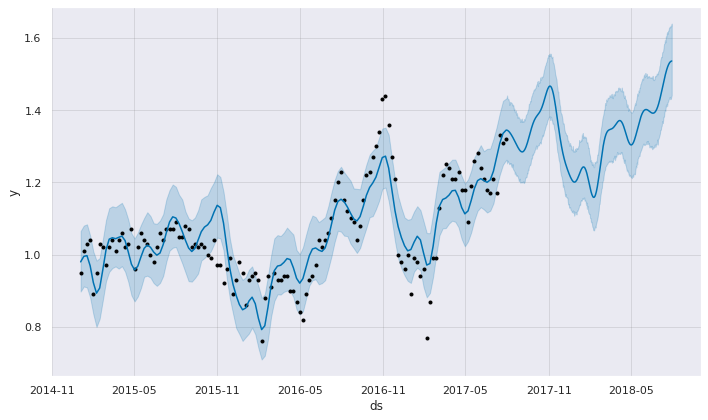

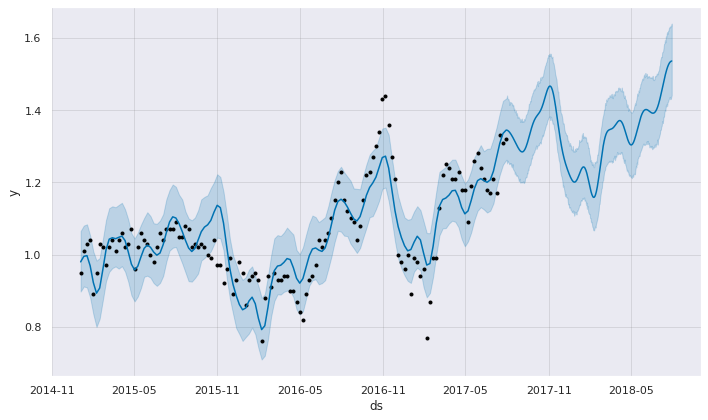

In [74]:
m1.plot(forecast)

In [75]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Feb
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Jan
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Jan
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Jan
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,Jan


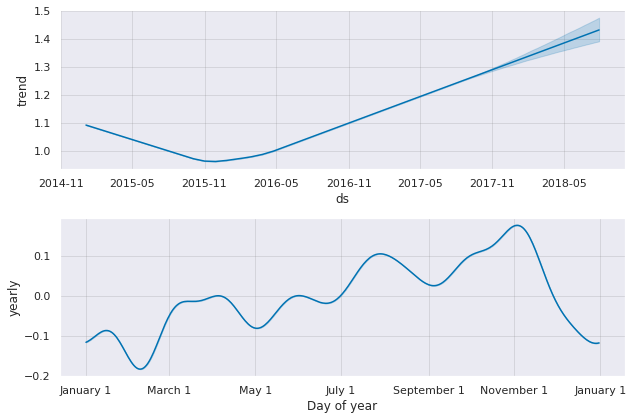

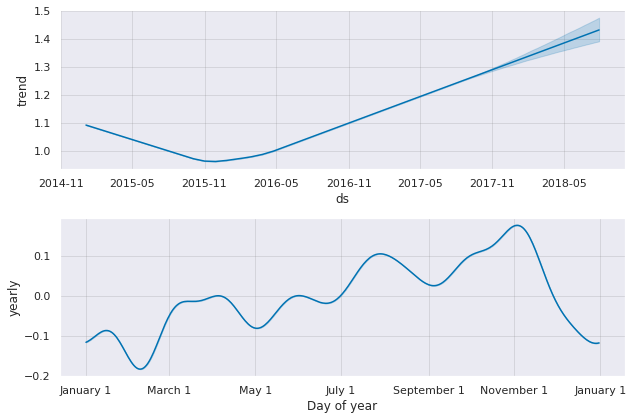

In [77]:
m1.plot_components(forecast)

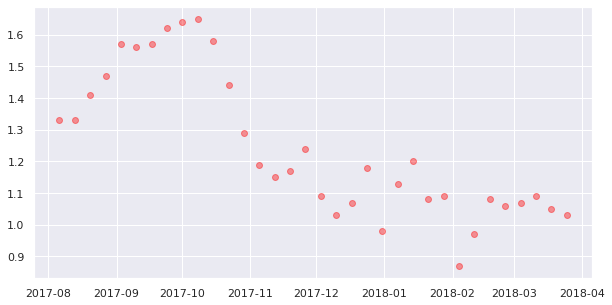

In [83]:
f,ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
ax.scatter(test.index,test['AveragePrice'],color='r',alpha=0.4)


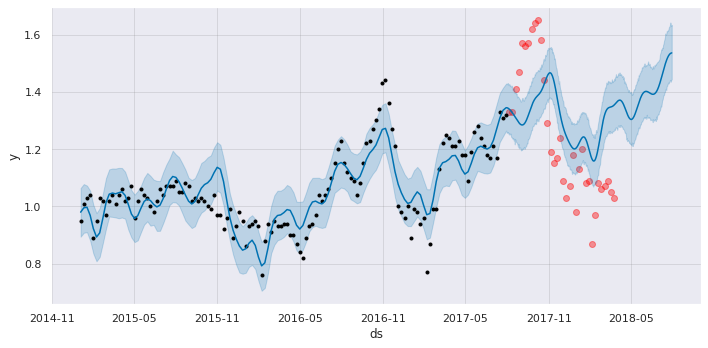

In [84]:
fig=m1.plot(forecast,ax=ax)
fig